20/12/2020

DUBOIS Thomas

manipulation pandas, numpy et matplotlib

Principalement de la manipulation de données : modification, ajout et suppression de variables.

In [842]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

# Introduction

Pour ce Notebook nous allons utiliser le jeux de donnée portant sur 10 000 vols sur l'aéroport de Chicago (ORD).
L'objectif est ici de trouver des information sur les retards en provenance de ORD.

In [922]:
df = pd.read_csv("data/flight.csv", sep=";")
df

,ID_vol,Year,Month,DayofMonth,DayOfWeek,Dep_hour,Dep_min,Arr_hour,Arr_min,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,2008,7,1,2,9.0,43.0,12.0,18.0,14.0,-7.0,BOS,CLT,728
1,2,2008,11,12,3,10.0,40.0,13.0,2.0,37.0,9.0,ICT,ORD,588
2,3,2008,8,19,2,6.0,57.0,8.0,8.0,-10.0,-3.0,ANC,BET,399
3,4,2008,11,30,7,12.0,58.0,17.0,8.0,26.0,-2.0,LAX,KOA,2504
4,5,2008,9,21,7,10.0,1.0,12.0,46.0,-14.0,-4.0,MSP,DTW,528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2008,7,18,5,14.0,12.0,15.0,53.0,-4.0,-5.0,MEM,IAH,469
9996,9997,2008,4,23,3,10.0,57.0,11.0,12.0,-17.0,-9.0,ATL,GPT,352
9997,9998,2008,6,14,6,16.0,40.0,17.0,45.0,-3.0,-10.0,FLG,PHX,119
9998,9999,2008,4,28,1,8.0,32.0,10.0,55.0,-5.0,-3.0,ATL,HPN,780


In [844]:
liste_df = list(df)
liste_df

['ID_vol',
 'Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Dep_hour',
 'Dep_min',
 'Arr_hour',
 'Arr_min',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance']

On commence par ne garder que les vols au départ de ORD :

In [845]:
df_flightORD = df.loc[df['Origin']=='ORD']
df_flightORD

,ID_vol,Year,Month,DayofMonth,DayOfWeek,Dep_hour,Dep_min,Arr_hour,Arr_min,ArrDelay,DepDelay,Origin,Dest,Distance
15,16,2008,3,17,1,20.0,25.0,23.0,54.0,29.0,35.0,ORD,TPA,1012
52,53,2008,1,25,5,6.0,27.0,9.0,20.0,15.0,17.0,ORD,BWI,622
55,56,2008,5,13,2,12.0,5.0,15.0,52.0,-18.0,-5.0,ORD,FLL,1182
61,62,2008,6,1,7,14.0,43.0,17.0,10.0,-6.0,-2.0,ORD,DFW,802
81,82,2008,11,25,2,12.0,20.0,15.0,30.0,13.0,25.0,ORD,LGA,733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,9911,2008,11,22,6,9.0,59.0,12.0,25.0,-15.0,-6.0,ORD,SLC,1249
9923,9924,2008,5,4,7,21.0,2.0,0.0,1.0,2.0,7.0,ORD,BDL,783
9926,9927,2008,4,24,4,9.0,8.0,11.0,2.0,7.0,-2.0,ORD,GRR,137
9929,9930,2008,1,16,3,15.0,8.0,18.0,6.0,-14.0,-2.0,ORD,PVD,849


On perd beaucoup d'informations... On passe à 505 données.

In [846]:
df_flightORD['Year'].describe()

count     505.0
mean     2008.0
std         0.0
min      2008.0
25%      2008.0
50%      2008.0
75%      2008.0
max      2008.0
Name: Year, dtype: float64

On supprime la variable Year car tous les vols sont en 2008.

In [847]:
del df_flightORD['Year']

On check les NaN :

In [848]:
df_flightORD.isna().sum()

ID_vol         0
Month          0
DayofMonth     0
DayOfWeek      0
Dep_hour      21
Dep_min       21
Arr_hour      21
Arr_min       21
ArrDelay      21
DepDelay      21
Origin         0
Dest           0
Distance       0
dtype: int64

On va supprimer les variables avec Nan.

In [849]:
df_flightORD = df_flightORD.dropna()

On peut essayer de voir si il y a une correlation forte ou non entre le retard au départ et à l'arrivé :

[]

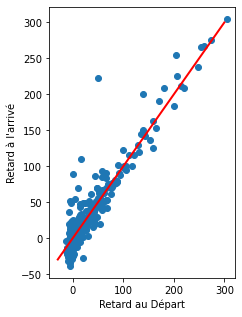

In [850]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=1, wspace=1)


# plot 1
ax1 = plt.subplot(1,2,1)

ax1.scatter(df_flightORD['DepDelay'], df_flightORD['ArrDelay'])
plt.xlabel('Retard au Départ')
plt.ylabel("Retard à l'arrivé")

plt.plot([-30.0, 300], [-30.0, 300.0], 'r-', lw=2) # Red straight line

plt.plot()

On a tracé en rouge la droite d'équation x=y (soit dans ce cas pas de retard au départ et pas de retard à l'arrivé) on remarque que le retard peut etre quelque peu modifier entre le déaprt et l'arrivé, mais que dans l'ensemble il reste plutot proportionnelle, on regarde le coéfficient de corrélation :

<AxesSubplot:>

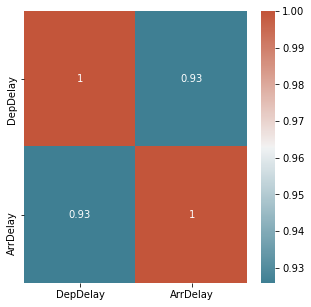

In [851]:
corr = df[['DepDelay','ArrDelay']].corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Très grosse correlation, on décide de ne garder que le retard au départ.

In [852]:
del df_flightORD['DepDelay']

On veux regarder la répartition des vols selon l'heure de départ;

commencons par voir les répartitions jours et nuit (on partira du principe que nuit = 22h $\to$ 5h).

In [853]:
df_flightORD[(df_flightORD['Dep_hour']>=22) | (df_flightORD['Dep_hour']<=5)]['Dep_hour'].count()

17

Il y a très peu de vols de nuit. On peut donc les regrouper en une même modalité : vol de nuit.

On pourrait ainsi créer selon plusieurs modalités : matin, midi, après-midi, soirée, nuit.

On s'occupera de cela dans la partie création de variables.

Voyons maintenant si il ya des valeurs abhérantes.

In [854]:
(df_flightORD.groupby('Dest')['Distance'].nunique() != 1).sum()

0

Ici 0 signifie qu'il n'y a aucune destination qui possède plusieurs distances différentes. Etant donné que l'on part toujourds du même aéroport, cela est donc une bonne nouvelle, il n'y a pas d'erreur sur une distance !

In [855]:
df_flightORD.describe()

,ID_vol,Month,DayofMonth,DayOfWeek,Dep_hour,Dep_min,Arr_hour,Arr_min,ArrDelay,Distance
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,4996.452479,6.299587,15.911157,3.913223,13.733471,30.925620,15.404959,29.183884,19.179752,678.793388
std,2951.700016,3.390878,9.169350,1.961511,4.760652,17.926427,5.179716,18.008546,51.283271,527.400876
min,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-39.000000,67.000000
25%,2282.500000,4.000000,8.000000,2.000000,9.750000,14.000000,12.000000,13.000000,-10.000000,296.000000
50%,4877.000000,6.000000,16.000000,4.000000,14.000000,33.000000,16.000000,29.000000,1.000000,590.000000
75%,7548.500000,9.000000,24.000000,6.000000,18.000000,46.000000,20.000000,45.000000,25.000000,853.000000
max,9930.000000,12.000000,31.000000,7.000000,23.000000,59.000000,24.000000,59.000000,305.000000,4243.000000


en regardant les valeurs, il ne semble pas y avoir de valeurs abhérantes : pas de jours autre que entre 1 et 7, pas d'heures autre que entre 0 et 24, pas de minutes autre que entre 0 et 60, pas de mois autres que entre 1 et 12, pas de jours du mois autre que entre 1 et 31.

# Creation de variables

On va créer une première variable qui sera la période de la journée :

        nuit < 6h00

6h00<= matin < 11h00

11h00 <= midi < 14h00

14h00 <= après-midi < 19h00

19h00 <= soirée < 22h00

nuit>22h00

In [856]:
def set_mod_journee(tab_heure):
    res = []
    for heure in tab_heure:
        if heure<6:
            temp_res = 'nuit'
        elif heure<11:
            temp_res = 'matin'
        elif heure<14:
            temp_res = 'midi'
        elif heure<19:
            temp_res = 'apres-midi'
        elif heure < 22: 
            temp_res = 'soiree'
        else:
            temp_res = 'nuit'
        res.append(temp_res)
        
    return res

In [857]:
df_flightORD['Dep_hour_class'] = set_mod_journee(df_flightORD['Dep_hour'])

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [858]:
df_flightORD

,ID_vol,Month,DayofMonth,DayOfWeek,Dep_hour,Dep_min,Arr_hour,Arr_min,ArrDelay,Origin,Dest,Distance,Dep_hour_class
15,16,3,17,1,20.0,25.0,23.0,54.0,29.0,ORD,TPA,1012,soiree
52,53,1,25,5,6.0,27.0,9.0,20.0,15.0,ORD,BWI,622,matin
55,56,5,13,2,12.0,5.0,15.0,52.0,-18.0,ORD,FLL,1182,midi
61,62,6,1,7,14.0,43.0,17.0,10.0,-6.0,ORD,DFW,802,apres-midi
81,82,11,25,2,12.0,20.0,15.0,30.0,13.0,ORD,LGA,733,midi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,9897,11,9,7,8.0,26.0,9.0,55.0,-20.0,ORD,LIT,552,matin
9910,9911,11,22,6,9.0,59.0,12.0,25.0,-15.0,ORD,SLC,1249,matin
9923,9924,5,4,7,21.0,2.0,0.0,1.0,2.0,ORD,BDL,783,soiree
9926,9927,4,24,4,9.0,8.0,11.0,2.0,7.0,ORD,GRR,137,matin


Nous allons créer une nouvelle variable calculant le temps du trajet :

In [859]:
from datetime import time

In [860]:
def calcul_trajet(tab):
    dep_heure,dep_min,arr_heure,arr_min = tab

    res = []
    for i in range(len(dep_heure)):
        minute = arr_min[i]-dep_min[i]
        if (minute<0):
            heure = -1
            minute = 60+minute
        else:
            heure = 0
        if arr_heure[i] - dep_heure[i] <0:
            heure = heure + (24-dep_heure[i]) + arr_heure[i]
        else:
            heure = heure + arr_heure[i] - dep_heure[i]

            
        dt = time(hour=int(heure), minute=int(minute))
        res.append(dt.isoformat(timespec='minutes'))

    return(res)

Nous utilisons isoformat pour afficher le temps sous forme de str, on precise minute car sinon on obtiendrais les secondes :

In [861]:
dt = time(hour=4, minute=10)
dt.isoformat()

'04:10:00'

On a besoin pour cela de list 2 dimension et non pas d'un df :

In [862]:
a =df_flightORD[['Dep_hour','Dep_min','Arr_hour','Arr_min']].values.tolist()
a

[[20.0, 25.0, 23.0, 54.0],
 [6.0, 27.0, 9.0, 20.0],
 [12.0, 5.0, 15.0, 52.0],
 [14.0, 43.0, 17.0, 10.0],
 [12.0, 20.0, 15.0, 30.0],
 [18.0, 14.0, 21.0, 11.0],
 [10.0, 1.0, 11.0, 53.0],
 [23.0, 39.0, 2.0, 18.0],
 [18.0, 47.0, 21.0, 46.0],
 [11.0, 41.0, 13.0, 55.0],
 [9.0, 26.0, 12.0, 47.0],
 [19.0, 11.0, 22.0, 46.0],
 [12.0, 14.0, 13.0, 33.0],
 [8.0, 0.0, 8.0, 47.0],
 [16.0, 11.0, 18.0, 55.0],
 [21.0, 40.0, 22.0, 34.0],
 [8.0, 0.0, 8.0, 59.0],
 [8.0, 59.0, 10.0, 51.0],
 [15.0, 3.0, 17.0, 59.0],
 [14.0, 54.0, 17.0, 6.0],
 [8.0, 51.0, 10.0, 34.0],
 [7.0, 20.0, 10.0, 7.0],
 [12.0, 53.0, 15.0, 1.0],
 [21.0, 26.0, 22.0, 57.0],
 [19.0, 49.0, 21.0, 25.0],
 [9.0, 11.0, 12.0, 7.0],
 [21.0, 40.0, 22.0, 19.0],
 [11.0, 12.0, 12.0, 52.0],
 [21.0, 30.0, 0.0, 9.0],
 [21.0, 6.0, 23.0, 57.0],
 [8.0, 37.0, 9.0, 49.0],
 [20.0, 5.0, 21.0, 32.0],
 [14.0, 55.0, 16.0, 32.0],
 [18.0, 14.0, 21.0, 3.0],
 [19.0, 31.0, 21.0, 14.0],
 [18.0, 21.0, 20.0, 26.0],
 [8.0, 22.0, 10.0, 20.0],
 [21.0, 40.0, 23.0, 5.0],
 [14

Pas bonne structure... Il faut donc changer la structure :

In [863]:
b = []
for i in range(len(a[0])):
    temp = []
    for j in range(len(a)):
        temp.append(a[j][i])
    b.append(temp)
        
len(b)

4

On peu maintenant appliquer notre fonction et la placer dans le df :

In [864]:
df_flightORD['Time_fly'] = calcul_trajet(b)

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [865]:
df_flightORD

,ID_vol,Month,DayofMonth,DayOfWeek,Dep_hour,Dep_min,Arr_hour,Arr_min,ArrDelay,Origin,Dest,Distance,Dep_hour_class,Time_fly
15,16,3,17,1,20.0,25.0,23.0,54.0,29.0,ORD,TPA,1012,soiree,03:29
52,53,1,25,5,6.0,27.0,9.0,20.0,15.0,ORD,BWI,622,matin,02:53
55,56,5,13,2,12.0,5.0,15.0,52.0,-18.0,ORD,FLL,1182,midi,03:47
61,62,6,1,7,14.0,43.0,17.0,10.0,-6.0,ORD,DFW,802,apres-midi,02:27
81,82,11,25,2,12.0,20.0,15.0,30.0,13.0,ORD,LGA,733,midi,03:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,9897,11,9,7,8.0,26.0,9.0,55.0,-20.0,ORD,LIT,552,matin,01:29
9910,9911,11,22,6,9.0,59.0,12.0,25.0,-15.0,ORD,SLC,1249,matin,02:26
9923,9924,5,4,7,21.0,2.0,0.0,1.0,2.0,ORD,BDL,783,soiree,02:59
9926,9927,4,24,4,9.0,8.0,11.0,2.0,7.0,ORD,GRR,137,matin,01:54


On va maintenant préciser lorsque l'on se trouve en semaine ou en weekend car on imagine que cela pourrait avoir une forte importance :

In [866]:
def week_or_weekend(day):

    res = []
    for i in range(len(day)):
        if (day[i]==6 or day[i]==7):
            temp = 'weekend'
        else:
            temp = 'week'
                   
        res.append(temp)

    return(res)

In [867]:
df_flightORD['DayOfWeekClass'] = week_or_weekend(df_flightORD['DayOfWeek'].values.tolist())
df_flightORD

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID_vol,Month,DayofMonth,DayOfWeek,Dep_hour,Dep_min,Arr_hour,Arr_min,ArrDelay,Origin,Dest,Distance,Dep_hour_class,Time_fly,DayOfWeekClass
15,16,3,17,1,20.0,25.0,23.0,54.0,29.0,ORD,TPA,1012,soiree,03:29,week
52,53,1,25,5,6.0,27.0,9.0,20.0,15.0,ORD,BWI,622,matin,02:53,week
55,56,5,13,2,12.0,5.0,15.0,52.0,-18.0,ORD,FLL,1182,midi,03:47,week
61,62,6,1,7,14.0,43.0,17.0,10.0,-6.0,ORD,DFW,802,apres-midi,02:27,weekend
81,82,11,25,2,12.0,20.0,15.0,30.0,13.0,ORD,LGA,733,midi,03:10,week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,9897,11,9,7,8.0,26.0,9.0,55.0,-20.0,ORD,LIT,552,matin,01:29,weekend
9910,9911,11,22,6,9.0,59.0,12.0,25.0,-15.0,ORD,SLC,1249,matin,02:26,weekend
9923,9924,5,4,7,21.0,2.0,0.0,1.0,2.0,ORD,BDL,783,soiree,02:59,weekend
9926,9927,4,24,4,9.0,8.0,11.0,2.0,7.0,ORD,GRR,137,matin,01:54,week


On pourrait le faire manuellement, mais long, fastidieux et pas le but, on importe un csv (converti à partir d'un fichier ics) donnant tous les jours feriés de 2000 à 2020 :

## Jours fériés

In [868]:
df_calandar =  pd.read_csv("data/US_calandar.csv", sep="	")
df_calandar

,Title,Given planned earliest start,Given planned earliest end,Notes,Assigned Resources,Additional Title
0,Easter Sunday,23.04.2000,24.04.2000,NaN,NaN,NaN
1,Easter Sunday,15.04.2001,16.04.2001,NaN,NaN,NaN
2,Easter Sunday,31.03.2002,01.04.2002,NaN,NaN,NaN
3,Easter Sunday,20.04.2003,21.04.2003,NaN,NaN,NaN
4,Easter Sunday,11.04.2004,12.04.2004,NaN,NaN,NaN
...,...,...,...,...,...,...
300,Labor Day (US-OPM),07.09.2020,08.09.2020,NaN,NaN,NaN
301,Columbus Day (US-OPM),12.10.2020,13.10.2020,NaN,NaN,NaN
302,Veterans Day (US-OPM),11.11.2020,12.11.2020,NaN,NaN,NaN
303,Thanksgiving Day (US-OPM),26.11.2020,27.11.2020,NaN,NaN,NaN


In [869]:
df_calandar = pd.DataFrame(np.array([['Birthday of Martin Luther King, Jr. (US-OPM)','21.01.2008','22.01.2008','NaN','NaN','NaN']]), \
        columns=["Title", "Given planned earliest start", "Given planned earliest end",'Notes','Assigned Resources','Additional Title']).append(df_calandar, ignore_index=True)

In [870]:
df_calandar = pd.DataFrame(np.array([['Memorial Day','26.05.2008','27.05.2008','NaN','NaN','NaN']]), \
        columns=["Title", "Given planned earliest start", "Given planned earliest end",'Notes','Assigned Resources','Additional Title']).append(df_calandar, ignore_index=True)
df_calandar = pd.DataFrame(np.array([['Labor Day (US-OPM)','01.09.2008','02.09.2008','NaN','NaN','NaN']]), \
        columns=["Title", "Given planned earliest start", "Given planned earliest end",'Notes','Assigned Resources','Additional Title']).append(df_calandar, ignore_index=True)
df_calandar = pd.DataFrame(np.array([['Columbus Day (US-OPM)','13.10.2008','14.10.2008','NaN','NaN','NaN']]), \
        columns=["Title", "Given planned earliest start", "Given planned earliest end",'Notes','Assigned Resources','Additional Title']).append(df_calandar, ignore_index=True)
df_calandar = pd.DataFrame(np.array([['Thanksgiving Day (US-OPM)','27.11.2008','28.11.2008','NaN','NaN','NaN']]), \
        columns=["Title", "Given planned earliest start", "Given planned earliest end",'Notes','Assigned Resources','Additional Title']).append(df_calandar, ignore_index=True)


In [871]:
df_calandar['Given planned earliest start'][df_calandar['Title']=="George Washington's Birthday (actual)"] = '18.02.2008'

In [872]:
df_calandar['Given planned earliest end'][df_calandar['Title']=="George Washington's Birthday (actual)"] = '19.02.2008'

In [873]:
df_calandar

,Title,Given planned earliest start,Given planned earliest end,Notes,Assigned Resources,Additional Title
0,Thanksgiving Day (US-OPM),27.11.2008,28.11.2008,NaN,NaN,NaN
1,Columbus Day (US-OPM),13.10.2008,14.10.2008,NaN,NaN,NaN
2,Labor Day (US-OPM),01.09.2008,02.09.2008,NaN,NaN,NaN
3,Memorial Day,26.05.2008,27.05.2008,NaN,NaN,NaN
4,"Birthday of Martin Luther King, Jr. (US-OPM)",21.01.2008,22.01.2008,NaN,NaN,NaN
...,...,...,...,...,...,...
305,Labor Day (US-OPM),07.09.2020,08.09.2020,NaN,NaN,NaN
306,Columbus Day (US-OPM),12.10.2020,13.10.2020,NaN,NaN,NaN
307,Veterans Day (US-OPM),11.11.2020,12.11.2020,NaN,NaN,NaN
308,Thanksgiving Day (US-OPM),26.11.2020,27.11.2020,NaN,NaN,NaN


Il n'est pas très bien structuré... Nous allons avoir un premier travail de traitement de la data.

In [874]:
df_calandar[df_calandar['Notes'] == 'FREQ=YEARLY'].head()

,Title,Given planned earliest start,Given planned earliest end,Notes,Assigned Resources,Additional Title
158,Halloween,31.10.2000,01.11.2000,FREQ=YEARLY,NaN,NaN
159,Veteran's Day,11.11.2000,12.11.2000,FREQ=YEARLY,NaN,NaN
161,Christmas Day,25.12.2000,26.12.2000,FREQ=YEARLY,NaN,NaN
162,New Year's Day,01.01.2000,02.01.2000,FREQ=YEARLY,NaN,NaN
163,New Year's Eve,31.12.2000,01.01.2001,FREQ=YEARLY,NaN,NaN


Toutes ces dates sont à répéter toutes les années, étant donné que l'on a uniquement besoin de 2008, on les transforme en 2008.

On va commencer par convertir nos deux colonnes en format date :

In [875]:
date_1 = df_calandar['Given planned earliest start'].values.tolist()

In [876]:
day_1   = [] 
month_1 = []
year_1  = []
for tmp_date in date_1:
    day_1.append(int(tmp_date[0:2]))
    month_1.append(int(tmp_date[3:5]))
    year_1.append(int(tmp_date[6:]))

In [877]:
date_2 = df_calandar['Given planned earliest end'].values.tolist()

In [878]:
day_2   = [] 
month_2 = []
year_2  = []
for tmp_date in date_2:
    day_2.append(int(tmp_date[0:2]))
    month_2.append(int(tmp_date[3:5]))
    year_2.append(int(tmp_date[6:]))

In [879]:
del df_calandar['Given planned earliest start']
del df_calandar['Given planned earliest end']

In [880]:
df_calandar['day_begin']   = day_1
df_calandar['month_begin'] = month_1
df_calandar['year_begin']  = year_1

df_calandar['day_end']   = day_2
df_calandar['month_end'] = month_2
df_calandar['year_end']  = year_2

On veut passer toutes les valeurs de **FREQ=YEARLY** à l'année 2008, mais avant cela il aut faire attention certaines fetes sont a cheval sur plusieurs années... Pour cela on va le preciser d'une autre manière :

In [881]:
df_calandar['year_end'][df_calandar['Notes'] == 'FREQ=YEARLY'] = df_calandar['year_end'][df_calandar['Notes'] == 'FREQ=YEARLY']\
                                                            - df_calandar['year_begin'][df_calandar['Notes'] == 'FREQ=YEARLY']

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Ainsi **year_end** contient le nombre d'année de décalage par rapport au début

In [882]:
df_calandar[df_calandar['Notes'] == 'FREQ=YEARLY'].head()

,Title,Notes,Assigned Resources,Additional Title,day_begin,month_begin,year_begin,day_end,month_end,year_end
158,Halloween,FREQ=YEARLY,NaN,NaN,31,10,2000,1,11,0
159,Veteran's Day,FREQ=YEARLY,NaN,NaN,11,11,2000,12,11,0
161,Christmas Day,FREQ=YEARLY,NaN,NaN,25,12,2000,26,12,0
162,New Year's Day,FREQ=YEARLY,NaN,NaN,1,1,2000,2,1,0
163,New Year's Eve,FREQ=YEARLY,NaN,NaN,31,12,2000,1,1,1


In [883]:
df_calandar['year_begin'][df_calandar['Notes'] == 'FREQ=YEARLY'] = 2008

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [884]:
df_calandar[df_calandar['Notes'] == 'FREQ=YEARLY'].head()

,Title,Notes,Assigned Resources,Additional Title,day_begin,month_begin,year_begin,day_end,month_end,year_end
158,Halloween,FREQ=YEARLY,NaN,NaN,31,10,2008,1,11,0
159,Veteran's Day,FREQ=YEARLY,NaN,NaN,11,11,2008,12,11,0
161,Christmas Day,FREQ=YEARLY,NaN,NaN,25,12,2008,26,12,0
162,New Year's Day,FREQ=YEARLY,NaN,NaN,1,1,2008,2,1,0
163,New Year's Eve,FREQ=YEARLY,NaN,NaN,31,12,2008,1,1,1


On redonne donc la bonne année à **year_end**

In [885]:
df_calandar['year_end'][df_calandar['Notes'] == 'FREQ=YEARLY'] = df_calandar['year_begin'][df_calandar['Notes'] == 'FREQ=YEARLY']\
                                                            + df_calandar['year_end'][df_calandar['Notes'] == 'FREQ=YEARLY']

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [886]:
df_calandar.loc[df_calandar['year_begin']!=2008]

,Title,Notes,Assigned Resources,Additional Title,day_begin,month_begin,year_begin,day_end,month_end,year_end
5,Easter Sunday,NaN,NaN,NaN,23,4,2000,24,4,2000
6,Easter Sunday,NaN,NaN,NaN,15,4,2001,16,4,2001
7,Easter Sunday,NaN,NaN,NaN,31,3,2002,1,4,2002
8,Easter Sunday,NaN,NaN,NaN,20,4,2003,21,4,2003
9,Easter Sunday,NaN,NaN,NaN,11,4,2004,12,4,2004
...,...,...,...,...,...,...,...,...,...,...
305,Labor Day (US-OPM),NaN,NaN,NaN,7,9,2020,8,9,2020
306,Columbus Day (US-OPM),NaN,NaN,NaN,12,10,2020,13,10,2020
307,Veterans Day (US-OPM),NaN,NaN,NaN,11,11,2020,12,11,2020
308,Thanksgiving Day (US-OPM),NaN,NaN,NaN,26,11,2020,27,11,2020


In [887]:
df_calandar['ind']=range(len(df_calandar))
df_calandar

,Title,Notes,Assigned Resources,Additional Title,day_begin,month_begin,year_begin,day_end,month_end,year_end,ind
0,Thanksgiving Day (US-OPM),NaN,NaN,NaN,27,11,2008,28,11,2008,0
1,Columbus Day (US-OPM),NaN,NaN,NaN,13,10,2008,14,10,2008,1
2,Labor Day (US-OPM),NaN,NaN,NaN,1,9,2008,2,9,2008,2
3,Memorial Day,NaN,NaN,NaN,26,5,2008,27,5,2008,3
4,"Birthday of Martin Luther King, Jr. (US-OPM)",NaN,NaN,NaN,21,1,2008,22,1,2008,4
...,...,...,...,...,...,...,...,...,...,...,...
305,Labor Day (US-OPM),NaN,NaN,NaN,7,9,2020,8,9,2020,305
306,Columbus Day (US-OPM),NaN,NaN,NaN,12,10,2020,13,10,2020,306
307,Veterans Day (US-OPM),NaN,NaN,NaN,11,11,2020,12,11,2020,307
308,Thanksgiving Day (US-OPM),NaN,NaN,NaN,26,11,2020,27,11,2020,308


In [888]:
ind_delete = df_calandar['ind'][(df_calandar['year_begin']!=2008)]
df_calandar.drop(ind_delete, inplace=True)
del df_calandar['ind']

In [889]:
df_calandar.sort_values(['year_begin','month_begin','day_begin'])

,Title,Notes,Assigned Resources,Additional Title,day_begin,month_begin,year_begin,day_end,month_end,year_end
162,New Year's Day,FREQ=YEARLY,NaN,NaN,1,1,2008,2,1,2008
191,Epiphany,FREQ=YEARLY,NaN,NaN,6,1,2008,7,1,2008
4,"Birthday of Martin Luther King, Jr. (US-OPM)",NaN,NaN,NaN,21,1,2008,22,1,2008
175,Groundhog's Day,FREQ=YEARLY,NaN,NaN,2,2,2008,3,2,2008
33,Ash Wednesday,NaN,NaN,NaN,6,2,2008,7,2,2008
174,Abraham Lincoln's Birthday,FREQ=YEARLY,NaN,NaN,12,2,2008,13,2,2008
173,Valentine's Day,FREQ=YEARLY,NaN,NaN,14,2,2008,15,2,2008
172,George Washington's Birthday (actual),FREQ=YEARLY,NaN,NaN,18,2,2008,19,2,2008
51,Palm Sunday,NaN,NaN,NaN,16,3,2008,17,3,2008
171,St. Patrick's Day,FREQ=YEARLY,NaN,NaN,17,3,2008,18,3,2008


Ok... on a toutes les dates importantes de l'année, bon en faisant quelques recherches on voit que en soit elles ne sont pas toutes fériés... toutn cela dépend des etats et des communautés...

In [890]:
del df_calandar['Assigned Resources']
del df_calandar['Additional Title']

On décide d'affecter manuellement les 'jours fériés' et de placer les autres comme 'autre'.

In [905]:
jour_ferie = ["New Year's Day",
              'Birthday of Martin Luther King, Jr. (US-OPM)',
             "George Washington's Birthday (actual)",
              'Memorial Day',
              'Labor Day (US-OPM)',
              'Independence Day',
             'Columbus Day (US-OPM)',
              "Veteran's Day",
              "Thanksgiving Day (US-OPM)",
              "Christmas Day"]

In [906]:
len(jour_ferie)

10

In [908]:
date = []
for i in jour_ferie :
    day   = df_calandar['day_begin'][df_calandar['Title'] == i].values
    month = df_calandar['month_begin'][df_calandar['Title'] == i].values
    date.append([day[0],month[0]])


In [909]:
for i in date:
    df_flightORD['DayOfWeekClass'][(df_flightORD['Month']==i[1]) & (df_flightORD['DayofMonth']==i[0])] = 'Ferié'

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\utilisateur\Anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\utilisateur\Anaconda3\lib\

In [918]:
df_flightORD[df_flightORD['DayOfWeekClass']=='Ferié']

,ID_vol,Month,DayofMonth,DayOfWeek,Dep_hour,Dep_min,Arr_hour,Arr_min,ArrDelay,Origin,Dest,Distance,Dep_hour_class,Time_fly,DayOfWeekClass,Season
1733,1734,1,1,2,23.0,0.0,0.0,9.0,102.0,ORD,ATW,160,nuit,01:09,Ferié,hiver
1801,1802,7,4,5,12.0,31.0,13.0,51.0,-24.0,ORD,LNK,466,midi,01:20,Ferié,été
3333,3334,11,27,4,9.0,55.0,12.0,34.0,5.0,ORD,PDX,1739,matin,02:39,Ferié,automne
4498,4499,1,21,1,12.0,38.0,14.0,56.0,21.0,ORD,PIT,412,midi,02:18,Ferié,hiver
4787,4788,7,4,5,9.0,44.0,11.0,52.0,-3.0,ORD,LAX,1745,matin,02:08,Ferié,été
4814,4815,10,13,1,21.0,13.0,23.0,21.0,-13.0,ORD,CAK,344,soiree,02:08,Ferié,automne
6427,6428,11,11,2,9.0,56.0,12.0,33.0,-27.0,ORD,PHX,1440,matin,02:37,Ferié,automne
8796,8797,9,1,1,8.0,31.0,10.0,48.0,51.0,ORD,PIT,412,matin,02:17,Ferié,été
9690,9691,5,26,1,8.0,1.0,9.0,26.0,-4.0,ORD,MCI,403,matin,01:25,Ferié,printemps


On va maintenant mettre en place les saisons !

printemps : 20 mars-> 20 juin

ete       : 21 juin-> 21 sept

automne   : 22 sept-> 20 dec

hiver     : 21 decembre->19 mars

In [911]:
def choix_saison(mois,jour):
    res = 'pas trouvé'
    if(mois == 4 or mois == 5):
        res = 'printemps'

    elif(mois == 7 or mois == 8):
        res = 'été'
    
    elif(mois == 10 or mois == 11):
        res = 'automne'
        
    elif(mois == 1 or mois==2):
        res = 'hiver'
        
    elif(mois ==3):
        if(jour<20):
            res = 'hiver'
        else:
            res = 'printemps'
    
    elif(mois ==6):
        if(jour<21):
            res = 'printemps'
        else:
            res = 'été'
    
    elif(mois ==9):
        if(jour<22):
            res = 'été'
        else:
            res = 'automne'
    
    elif(mois ==12):
        if(jour<21):
            res = 'automne'
        else:
            res = 'hiver'
    
    return res

In [912]:
col_mois = df_flightORD['Month'].values
col_jour = df_flightORD['DayofMonth'].values

In [913]:
col = []
for i in range(len(col_jour)):
    col.append(choix_saison(col_mois[i],col_jour[i]))

In [914]:
df_flightORD['Season'] = col

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [915]:
df_flightORD.head()

,ID_vol,Month,DayofMonth,DayOfWeek,Dep_hour,Dep_min,Arr_hour,Arr_min,ArrDelay,Origin,Dest,Distance,Dep_hour_class,Time_fly,DayOfWeekClass,Season
15,16,3,17,1,20.0,25.0,23.0,54.0,29.0,ORD,TPA,1012,soiree,03:29,week,hiver
52,53,1,25,5,6.0,27.0,9.0,20.0,15.0,ORD,BWI,622,matin,02:53,week,hiver
55,56,5,13,2,12.0,5.0,15.0,52.0,-18.0,ORD,FLL,1182,midi,03:47,week,printemps
61,62,6,1,7,14.0,43.0,17.0,10.0,-6.0,ORD,DFW,802,apres-midi,02:27,weekend,printemps
81,82,11,25,2,12.0,20.0,15.0,30.0,13.0,ORD,LGA,733,midi,03:10,week,automne


On a fini de créer nos nouvelles variables !

On va maintenant simplement regarder quelques impacts possibles en fonction des variables :

# Impact des variables sur le retard

In [916]:
df_flightORD.groupby('Season').describe()['ArrDelay']

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
automne,115.0,-0.643478,27.066258,-35.0,-14.0,-7.0,2.5,150.0
hiver,111.0,34.729730,61.860980,-25.0,-5.5,12.0,54.0,305.0
printemps,145.0,23.944828,49.660064,-30.0,-8.0,7.0,42.0,276.0
été,113.0,17.964602,54.707490,-39.0,-11.0,-1.0,23.0,267.0


Déjà la saison semble avoir un énorme impact ! D'énormes retard en Hiver (on sait qu'il neige et gêle en hiver, surement une des raisons) mais aussi au Printemps.

In [917]:
df_flightORD.groupby('DayOfWeekClass').describe()['ArrDelay']

,count,mean,std,min,25%,50%,75%,max
DayOfWeekClass,,,,,,,,
Ferié,9.0,12.000000,41.343077,-27.0,-13.00,-3.0,21.0,102.0
week,353.0,20.379603,53.110871,-39.0,-10.00,2.0,25.0,305.0
weekend,122.0,16.237705,46.503009,-32.0,-11.75,0.5,24.0,226.0


Ici semble pas très significatif.. Nous avons peu de jours fériés, peut-être serait il intelligent de faire une étude plus appronfondie : l'état de départ et ses jours fériés ont de l'importance, mais aussi multitude de jours feriés non officiels au USA...

[]

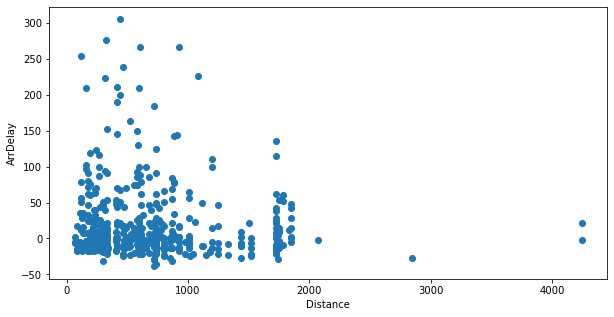

In [933]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=1, wspace=1)

# plot 1
ax1 = plt.subplot(1,1,1)

ax1.scatter(df_flightORD['Distance'], df_flightORD['ArrDelay'])
plt.xlabel('Distance')
plt.ylabel('ArrDelay')

plt.plot()

Les retards semblent plus présent sur les vols cours... En même temps beaucoup plus nombreux, pas sur que ca soit un facteur.

In [938]:
df_flightORD.groupby('Dep_hour_class').describe()['ArrDelay']

,count,mean,std,min,25%,50%,75%,max
Dep_hour_class,,,,,,,,
apres-midi,151.0,20.006623,44.847370,-29.0,-6.00,4.0,29.0,267.0
matin,140.0,4.642857,30.694614,-35.0,-13.00,-5.0,9.0,150.0
midi,86.0,15.069767,46.206389,-32.0,-11.75,0.5,21.0,226.0
nuit,17.0,89.588235,110.543011,-16.0,-3.00,71.0,130.0,305.0
soiree,90.0,31.033333,61.128792,-39.0,-9.00,7.0,45.5,254.0


De toute évidence, il y a beaucoup de retard la nuit de part la valeur du 3eme quartile et de la madiane.

De même (en moindre mesure) pour la soirée.

Ce Notebook est une ébauche, il serait à continuer et approfondir.